### **Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Dataset info**

In [2]:
df = pd.read_csv('netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### **Data cleaning**

In [5]:
df_clean = df.copy()

1. Check for duplicates

In [6]:
df_clean.duplicated().value_counts()

False    8790
dtype: int64

2. Quality issue

- date_added has the wrong data type
- duration has the wrong data type

In [7]:
# Change date_added to datetime format
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'])

3. Tidiness issue

- listed_in has several categories in a single observation

In [8]:
cat = set()
for i in df_clean['listed_in'].str.split(','):
    for j in i:
        cat.add(j.strip())

In [9]:
for x in cat:
    print(x)

Sci-Fi & Fantasy
LGBTQ Movies
TV Mysteries
Horror Movies
Action & Adventure
Thrillers
Sports Movies
TV Sci-Fi & Fantasy
Movies
Dramas
Classic & Cult TV
Romantic TV Shows
British TV Shows
Crime TV Shows
TV Action & Adventure
Children & Family Movies
International Movies
Cult Movies
TV Dramas
Teen TV Shows
Stand-Up Comedy & Talk Shows
Reality TV
Stand-Up Comedy
Faith & Spirituality
TV Shows
International TV Shows
TV Comedies
Romantic Movies
Science & Nature TV
TV Thrillers
Anime Features
Spanish-Language TV Shows
Korean TV Shows
Comedies
Classic Movies
Independent Movies
Music & Musicals
Anime Series
Docuseries
TV Horror
Kids' TV
Documentaries


In [10]:
cat_dict = dict()
i = 1
for x in cat:
    cat_dict[x] = i
    i = i + 1
cat_dict[0] = 0

In [11]:
cat_dict

{'Sci-Fi & Fantasy': 1,
 'LGBTQ Movies': 2,
 'TV Mysteries': 3,
 'Horror Movies': 4,
 'Action & Adventure': 5,
 'Thrillers': 6,
 'Sports Movies': 7,
 'TV Sci-Fi & Fantasy': 8,
 'Movies': 9,
 'Dramas': 10,
 'Classic & Cult TV': 11,
 'Romantic TV Shows': 12,
 'British TV Shows': 13,
 'Crime TV Shows': 14,
 'TV Action & Adventure': 15,
 'Children & Family Movies': 16,
 'International Movies': 17,
 'Cult Movies': 18,
 'TV Dramas': 19,
 'Teen TV Shows': 20,
 'Stand-Up Comedy & Talk Shows': 21,
 'Reality TV': 22,
 'Stand-Up Comedy': 23,
 'Faith & Spirituality': 24,
 'TV Shows': 25,
 'International TV Shows': 26,
 'TV Comedies': 27,
 'Romantic Movies': 28,
 'Science & Nature TV': 29,
 'TV Thrillers': 30,
 'Anime Features': 31,
 'Spanish-Language TV Shows': 32,
 'Korean TV Shows': 33,
 'Comedies': 34,
 'Classic Movies': 35,
 'Independent Movies': 36,
 'Music & Musicals': 37,
 'Anime Series': 38,
 'Docuseries': 39,
 'TV Horror': 40,
 "Kids' TV": 41,
 'Documentaries': 42,
 0: 0}

In [12]:
max = 0
min = 999
for i in df_clean['listed_in'].str.split(','):
    if len(i) > max:
        max = len(i)
    if len(i) < min:
        min = len(i)
print(max,min)

3 1


We can see that each observation has been categorized in from 1-3 categories. We would like to create new variables to exactly filter the data. We will assume that the first category would be the main category of the movie.

In [13]:
df_clean['maincat'] = 0
df_clean['subcat1'] = 0
df_clean['subcat2'] = 0
temp_cat = df_clean.listed_in.str.split(',')
i=0
for i in range (8790):
    t_cat = temp_cat[i]
    if len(t_cat) == 1:
        df_clean['maincat'][i] = temp_cat[i][0].strip()
        df_clean['subcat1'][i] = 0
        df_clean['subcat2'][i] = 0
    if len(t_cat) == 2:
        df_clean['maincat'][i] = temp_cat[i][0].strip()
        df_clean['subcat1'][i] = temp_cat[i][1].strip()
        df_clean['subcat2'][i] = 0
    if len(t_cat) == 3:
        df_clean['maincat'][i] = temp_cat[i][0].strip()
        df_clean['subcat1'][i] = temp_cat[i][1].strip()
        df_clean['subcat2'][i] = temp_cat[i][2].strip()

C:\Users\84702\AppData\Local\Temp\ipykernel_6756\3749868368.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['maincat'][i] = temp_cat[i][0].strip()
C:\Users\84702\AppData\Local\Temp\ipykernel_6756\3749868368.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['subcat1'][i] = 0
C:\Users\84702\AppData\Local\Temp\ipykernel_6756\3749868368.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['subcat2'][i] = 0

In [14]:
df_clean.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,maincat,subcat1,subcat2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies


We already have a category dictionary above, for further regression analysis, I will convert maincat from object type to integer type

In [15]:
df_clean.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,maincat,subcat1,subcat2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies


4. Two different observations on a single dataset

Because movies and TV shows were combined into a single dataframe, it was not possible to compare the lengths of these medias. And the duration of these medias are object type. We need to make the dataframe into two separated dataframes: df_move and df_tv

In [16]:
types =df.groupby(['type',])[ 'type'].count().reset_index(name='count')
types=types.set_index('type')

Text(0.5, 1.0, 'types_of_show')

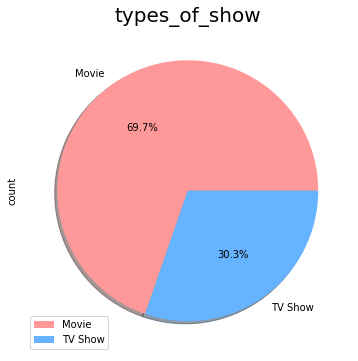

In [17]:
colors = ['#ff9999','#66b3ff']
types.plot.pie(y='count',autopct='%.1f%%', shadow=True, legend= 'type' , figsize=(6,6),colors=colors)
plt.title('types_of_show', fontsize=20)

In [18]:
df_tv = df_clean[df_clean.type == 'TV Show']
df_movie = df_clean[df_clean.type == 'Movie']

In [19]:
temp_dur_tv = df_tv.duration.str.split(' ',expand=True)
df_tv['duration_seasons'] = temp_dur_tv[0]
df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)

temp_dur_mv = df_movie.duration.str.split(' ',expand=True)
df_movie['duration_minutes'] = temp_dur_mv[0]
df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)

C:\Users\84702\AppData\Local\Temp\ipykernel_6756\327520735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration_seasons'] = temp_dur_tv[0]
C:\Users\84702\AppData\Local\Temp\ipykernel_6756\327520735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)
C:\Users\84702\AppData\Local\Temp\ipykernel_6756\327520735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

5. Storing


In [20]:
df_clean.to_csv('Netflix_DF_cleaned.csv')
df_tv.to_csv('Netflix_TV_cleaned.csv')
df_movie.to_csv('Netflix_Movie_cleaned.csv')

### **Analyzing and Visualizing**

1. What type of media has Netflix produced the most?
2. Which country produced the most of Netflix's media?
3. What are the most popular genres for countries that produced media?
4. What is the relationship between the year a media was made and when added to the Netflix platform?
5. Has Netflix's media classification changed over time?
6. What are the most popular genres for Netflix media?
7. Has the length of TV seasons or Movie's length changed over time?

Type of media by years

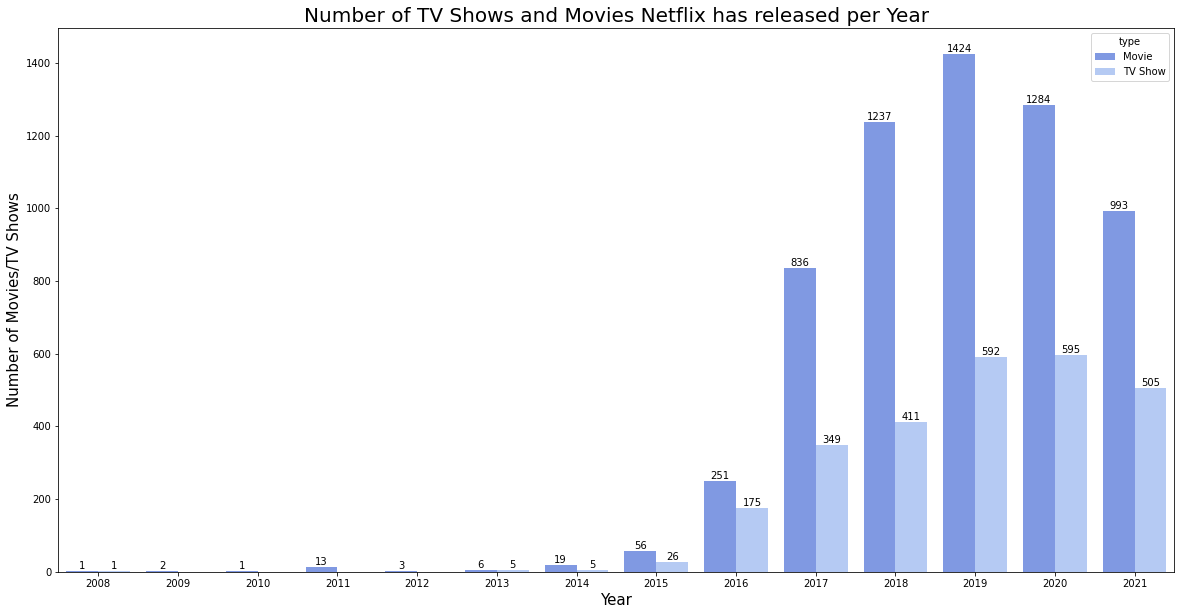

In [21]:
plt.figure(figsize=[20,10])
base_color = sns.color_palette('coolwarm',n_colors=5)
tv_movie = sns.countplot(x=df_clean.date_added.dt.year, data=df_clean, hue='type', palette = base_color)
tv_movie.set_title("Number of TV Shows and Movies Netflix has released per Year",fontsize = 20)
tv_movie.set_xlabel('Year',fontsize = 15)
tv_movie.set_ylabel('Number of Movies/TV Shows',fontsize = 15)
for container in tv_movie.containers:
    tv_movie.bar_label(container)
plt.show()

- There is a steady increase since 2012, but a big drop occured in 2021 possibly due to the impact of Covid-19.
- The number of movies produced each year is always larger than the number of TV shows produced.

By country

In [22]:
grp = df_clean.groupby('country').count().sort_values(by='show_id',ascending=False).reset_index()
grp

,country,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,maincat,subcat1,subcat2
0,United States,3240,3240,3240,3240,3240,3240,3240,3240,3240,3240,3240,3240
1,India,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057
2,United Kingdom,638,638,638,638,638,638,638,638,638,638,638,638
3,Pakistan,421,421,421,421,421,421,421,421,421,421,421,421
4,Not Given,287,287,287,287,287,287,287,287,287,287,287,287
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Soviet Union,1,1,1,1,1,1,1,1,1,1,1,1
82,Paraguay,1,1,1,1,1,1,1,1,1,1,1,1
83,Puerto Rico,1,1,1,1,1,1,1,1,1,1,1,1
84,Somalia,1,1,1,1,1,1,1,1,1,1,1,1


There are 287 observations whose countries are Not Given.

In [23]:
df_clean[df_clean['country'] == 'Not Given'].groupby('type').count().sort_values(by='show_id')

,show_id,title,director,country,date_added,release_year,rating,duration,listed_in,maincat,subcat1,subcat2
type,,,,,,,,,,,,
TV Show,30,30,30,30,30,30,30,30,30,30,30,30
Movie,257,257,257,257,257,257,257,257,257,257,257,257


Most of 'Not Given' observations are Movie, so we will show just the number of TV shows by country.

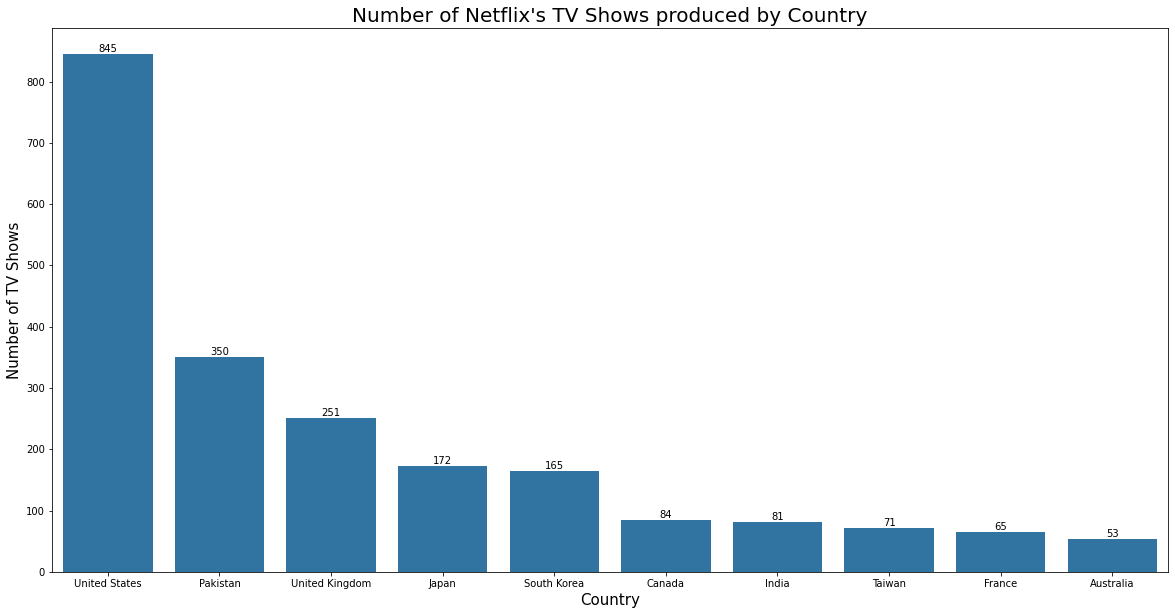

In [24]:
# Because there are too many countries, we will limit to the top 10 countries.
sort_order = df_tv.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_c = df_tv[df_tv['country'].isin(sort_order)]
base_color = base_color = sns.color_palette()[0]
plt.figure(figsize=[20,10])
tv_c = sns.countplot(x='country',data=df_tv_c,order=sort_order, color = base_color)
tv_c.set_title("Number of Netflix's TV Shows produced by Country",fontsize = 20)
tv_c.set_xlabel('Country',fontsize = 15)
tv_c.set_ylabel('Number of TV Shows',fontsize = 15)
for container in tv_c.containers:
    tv_c.bar_label(container)
plt.show()

It's not suprised that the most of the TV shows were produced in US, and the difference between top 1 and 2 is huge.

By genre and country

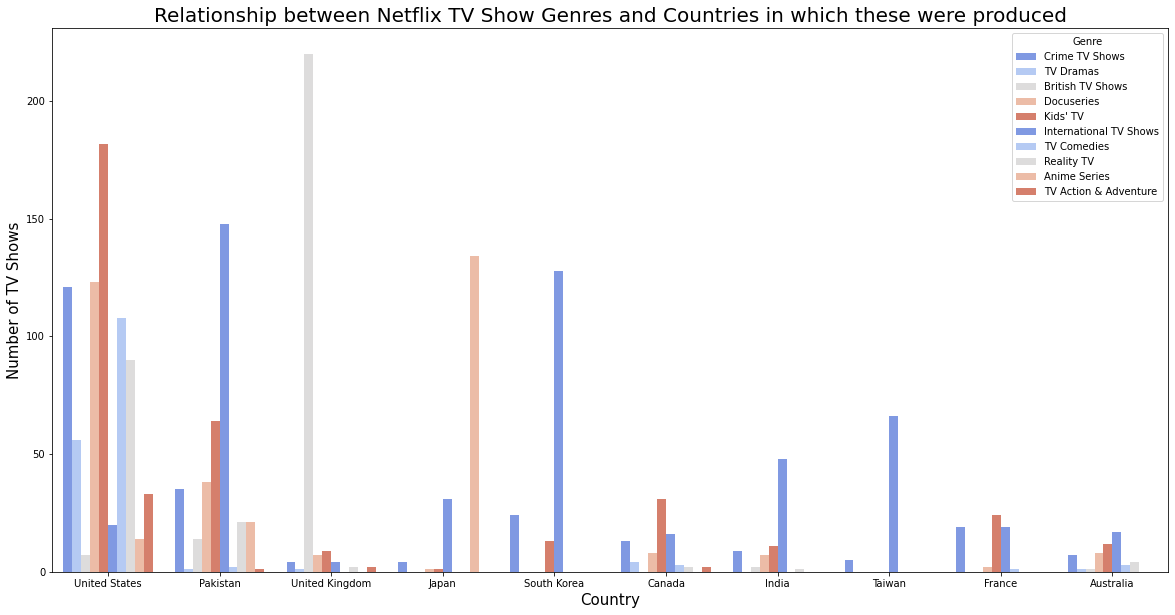

In [25]:
plt.figure(figsize=[20,10])
order1 = df_tv.groupby('maincat').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_f = df_tv[df_tv['maincat'].isin(order1)]
order2 = df_tv_f.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_f = df_tv_f[df_tv_f['country'].isin(order2)]
base_color = sns.color_palette('coolwarm',n_colors=5)
a=df_tv.date_added.dt.year
tv_g = sns.countplot(data=df_tv_f,x='country',hue='maincat', palette=base_color, order=order2)
tv_g.set_xlabel('Country',fontsize = 15)
tv_g.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g.set_title("Relationship between Netflix TV Show Genres and Countries in which these were produced",fontsize = 20)
plt.legend(title = 'Genre', loc = 'upper right')
plt.show()

- The most popular TV genres overall seem to be Kid’s TV(28) and International TV Shows(25). Considering that Netflix is an American company, it makes sense that shows produced outside of the US are considered ‘International TV Shows.
- UK has the biggest number of reality TV shows.
- Pakistan and South Korea both produced Kid's TV and International TV Shows the most.



By rating

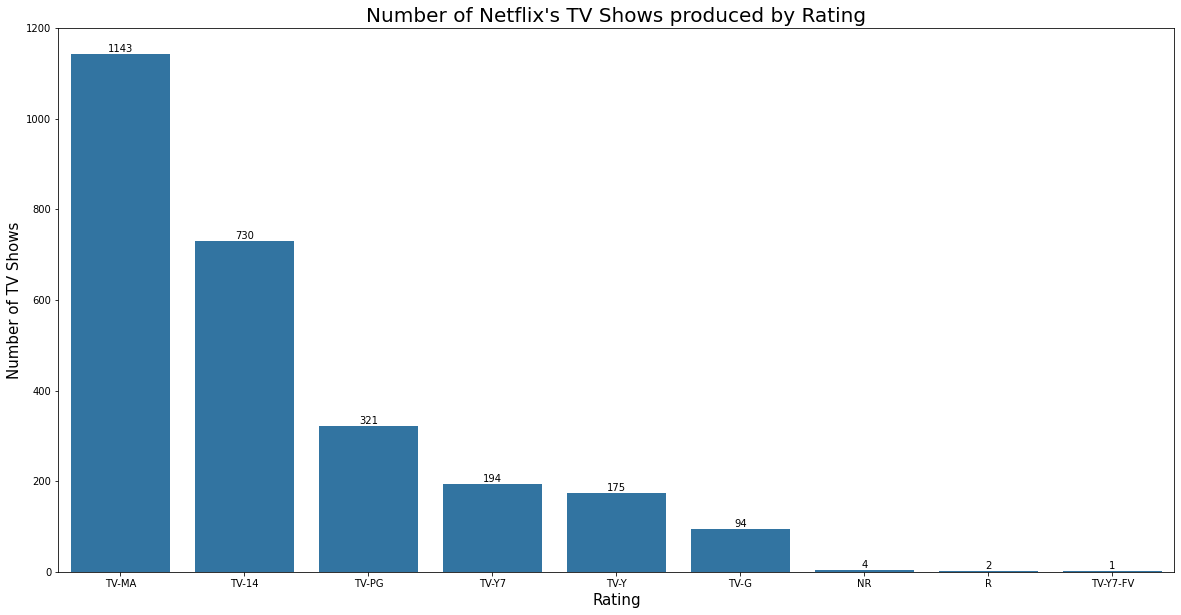

In [26]:
sort_order = df_tv.groupby('rating').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_c = df_tv[df_tv['rating'].isin(sort_order)]
base_color = base_color = sns.color_palette()[0]
plt.figure(figsize=[20,10])
tv_c = sns.countplot(x='rating',data=df_tv_c,order=sort_order, color = base_color)
tv_c.set_title("Number of Netflix's TV Shows produced by Rating",fontsize = 20)
tv_c.set_xlabel('Rating',fontsize = 15)
tv_c.set_ylabel('Number of TV Shows',fontsize = 15)
for container in tv_c.containers:
    tv_c.bar_label(container)
plt.show()

- Most of the TV shows are rated as TV-MA, TV-14, TV-PG, TV-Y7, TV-Y and TV-G.

Let's see the relationship between rating and the year added.

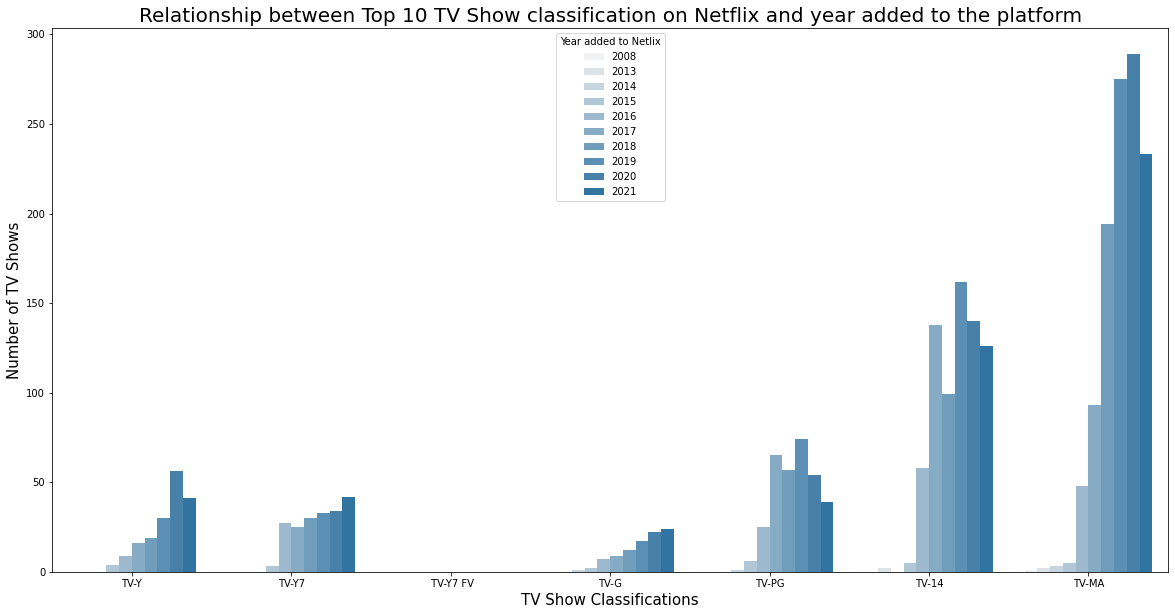

In [27]:
plt.figure(figsize=[20,10])
order = ['TV-Y', 'TV-Y7', ' TV-Y7 FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA']
base_color = base_color = sns.color_palette()[0]
a=df_tv.date_added.dt.year
tv_g = sns.countplot(data=df_tv,x='rating',hue=a, order=order, color=base_color)
tv_g.set_xlabel('TV Show Classifications',fontsize = 15)
tv_g.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g.set_title("Relationship between Top 10 TV Show classification on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix',)

- The only shows that had a steady increase with no drops whatsoever were the ones classified as TV-G and TV-Y7.

- Most of Netflix's TV shows are categorised as TV-MA (primarily) and TV-14 (secondarily). TV-MA had been steadily increasing up until 2021; whilst in the other hand TV-14 has had a sporadic growth with a decrease starting from 2020 - This possible due to TV Shows pushing their classification to a more mature audience (TV-MA).



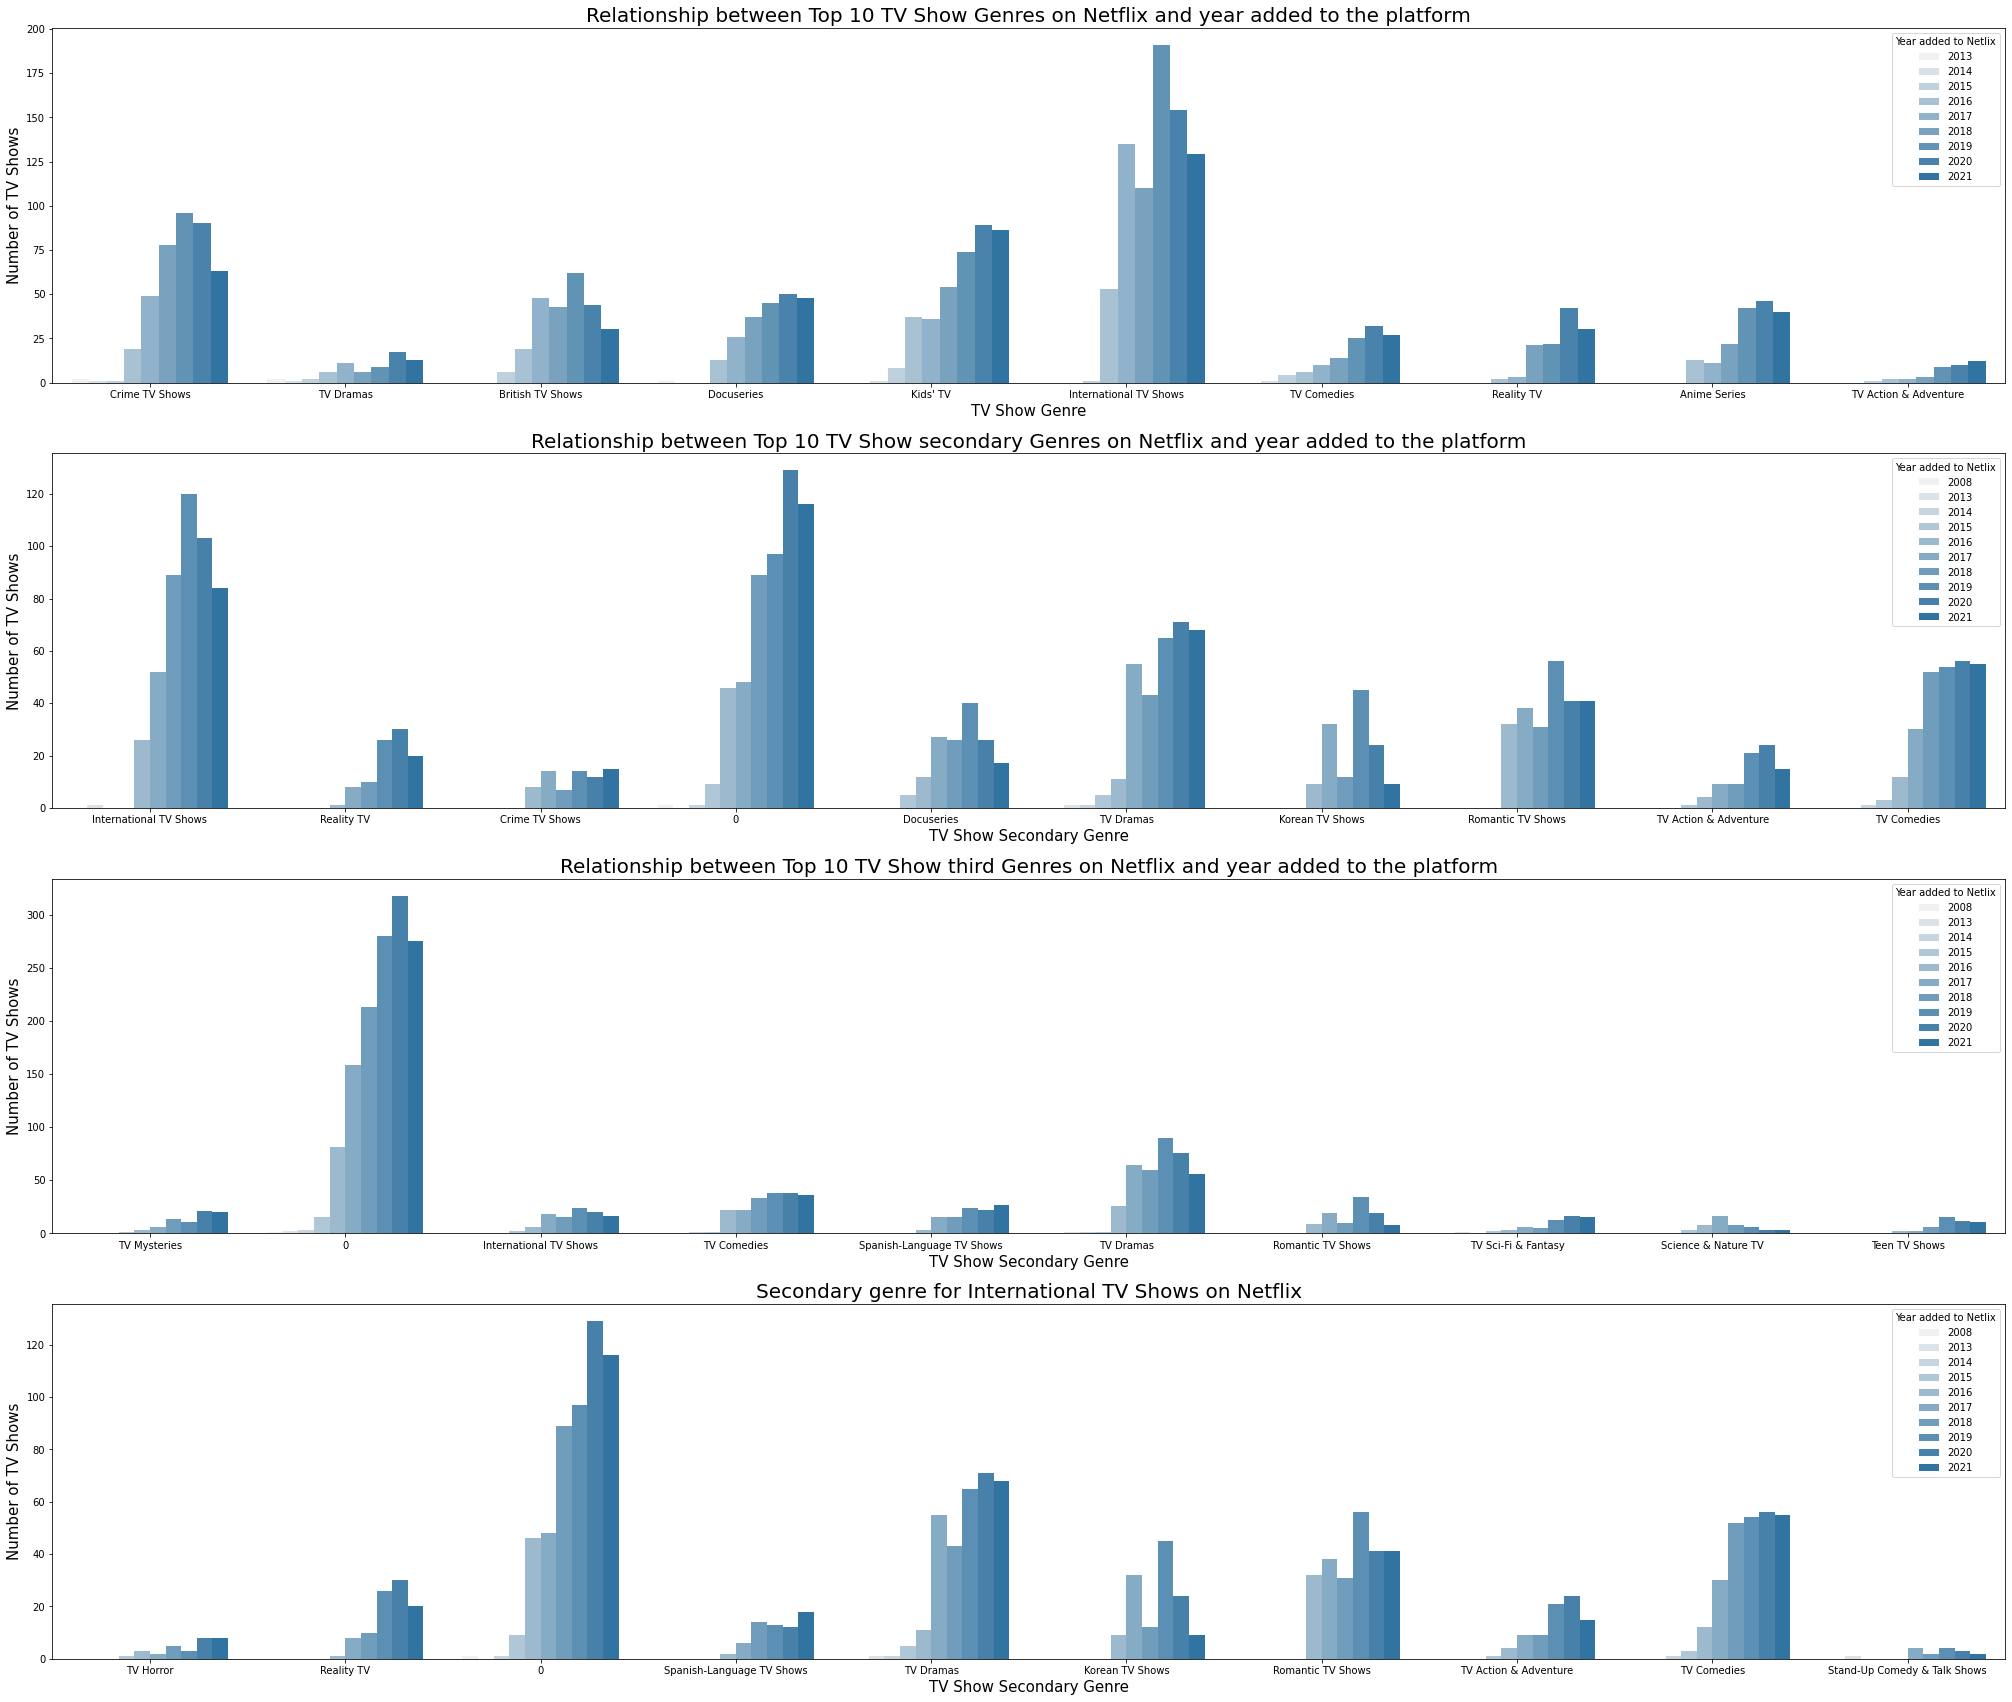

In [28]:
plt.figure(figsize=[35,30])
plt.subplot(4,1,1)

base_color = base_color = sns.color_palette()[0]
sort_order = df_tv.groupby('maincat').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g = df_tv[df_tv['maincat'].isin(sort_order)]
tv_g = sns.countplot(data=df_tv_g,x='maincat',hue=df_tv_g.date_added.dt.year, color=base_color)
tv_g.set_xlabel('TV Show Genre',fontsize = 15)
tv_g.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g.set_title("Relationship between Top 10 TV Show Genres on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix')


plt.subplot(4,1,2)

base_color = base_color = sns.color_palette()[0]
sort_order = df_tv.groupby('subcat1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g = df_tv[df_tv['subcat1'].isin(sort_order)]
tv_g1 = sns.countplot(data=df_tv_g,x='subcat1',hue=df_tv_g.date_added.dt.year, color=base_color)
tv_g1.set_xlabel('TV Show Secondary Genre',fontsize = 15)
tv_g1.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g1.set_title("Relationship between Top 10 TV Show secondary Genres on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix')

plt.subplot(4,1,3)

base_color = base_color = sns.color_palette()[0]
sort_order = df_tv.groupby('subcat2').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g = df_tv[df_tv['subcat2'].isin(sort_order)]
tv_g3 = sns.countplot(data=df_tv_g,x='subcat2',hue=df_tv_g.date_added.dt.year, color=base_color)
tv_g3.set_xlabel('TV Show Secondary Genre',fontsize = 15)
tv_g3.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g3.set_title("Relationship between Top 10 TV Show third Genres on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix', loc='upper right')

plt.subplot(4,1,4)
df_tv_g1 = df_tv.maincat=='International TV Shows'
df_tv_g1 = df_tv[df_tv_g1]
base_color = base_color = sns.color_palette()[0]
sort_order = df_tv_g1.groupby('subcat1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g1 = df_tv[df_tv['subcat1'].isin(sort_order)]
tv_g4 = sns.countplot(data=df_tv_g1,x='subcat1',hue=df_tv_g1.date_added.dt.year, color=base_color)
tv_g4.set_xlabel('TV Show Secondary Genre',fontsize = 15)
tv_g4.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g4.set_title("Secondary genre for International TV Shows on Netflix",fontsize = 20)
plt.legend(title = 'Year added to Netlix', loc='upper right')

Show rating overall

In [29]:
show_rating= df.groupby(['rating','type'])[ 'rating'].count().reset_index(name='ratings_count')
show_rating=show_rating.set_index('rating')

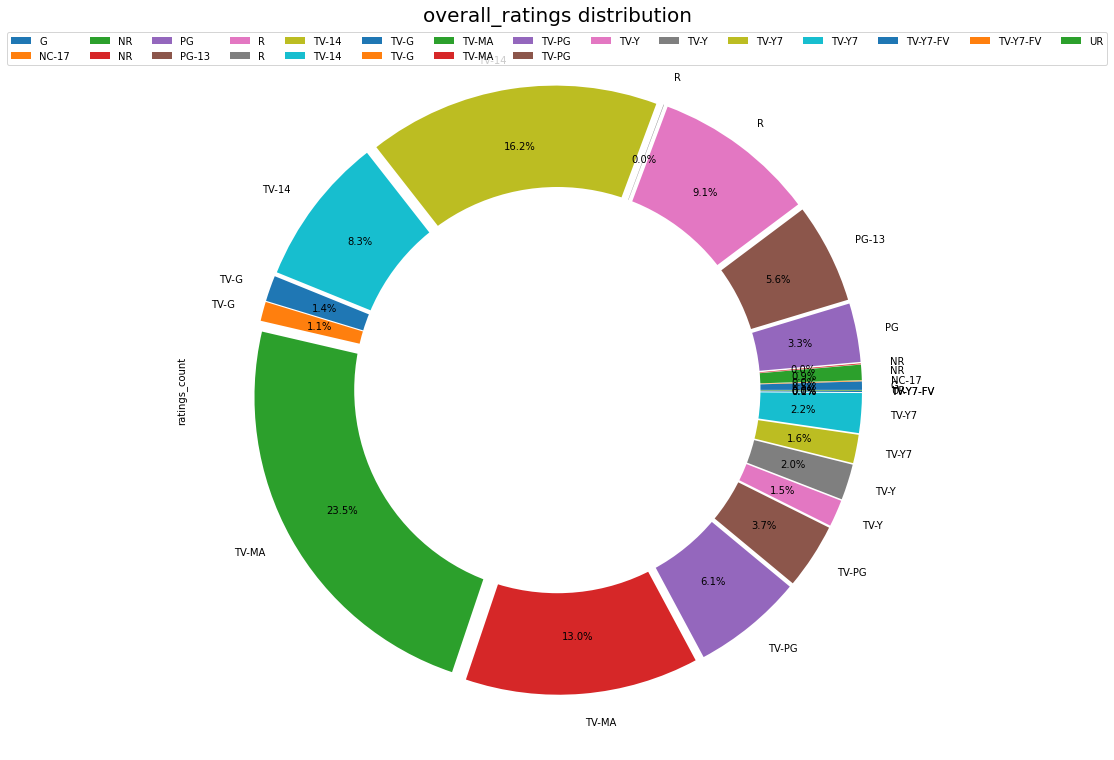

In [30]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05,0.05)
show_rating.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80,  explode=explode)
plt.title('overall_ratings distribution', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")

Movie rating

In [31]:
rating_movie= df.groupby(['rating','type'])['rating'].count().reset_index(name='ratings_count')
rating_movie=rating_movie.set_index('rating')

In [32]:
rating_movie = rating_movie[rating_movie['type'] == 'Movie']


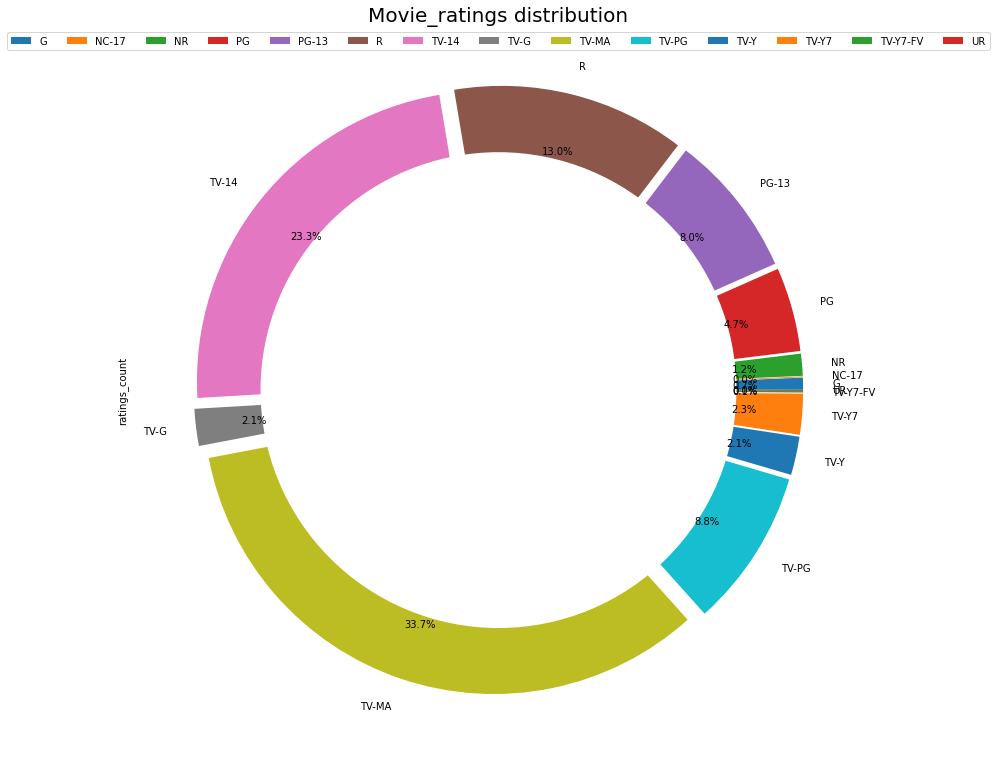

In [33]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05 )
rating_movie.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80,  explode=explode)
plt.title('Movie_ratings distribution', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")

TV shows rating

In [34]:
rating_TV= df.groupby(['rating','type'])['rating'].count().reset_index(name='ratings_count')
rating_TV=rating_TV.set_index('rating')
rating_TV = rating_TV[rating_TV['type'] == 'TV Show']


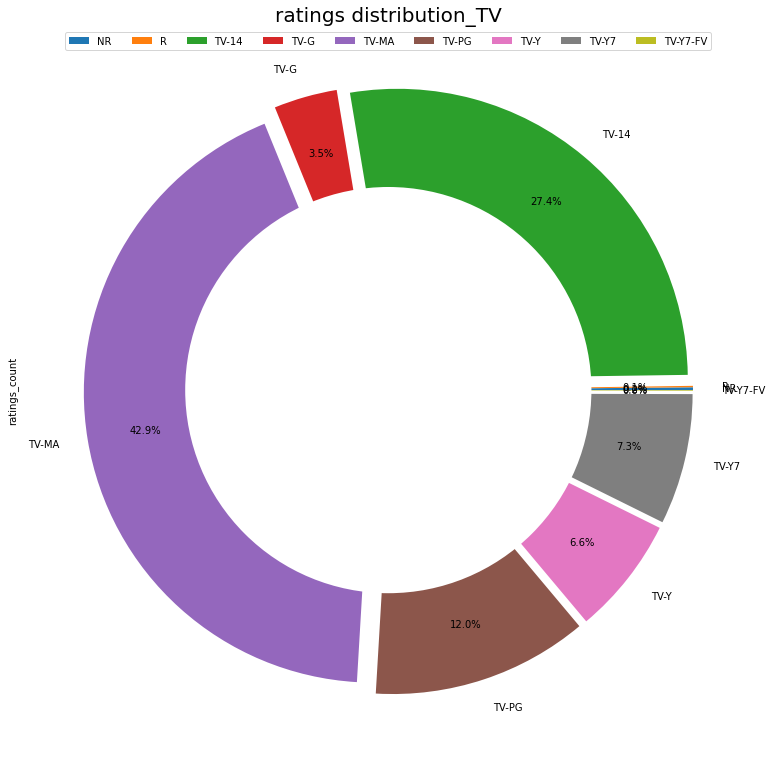

In [35]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
rating_TV.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80,  explode=explode)
plt.title('ratings distribution_TV', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")

Show length overtime

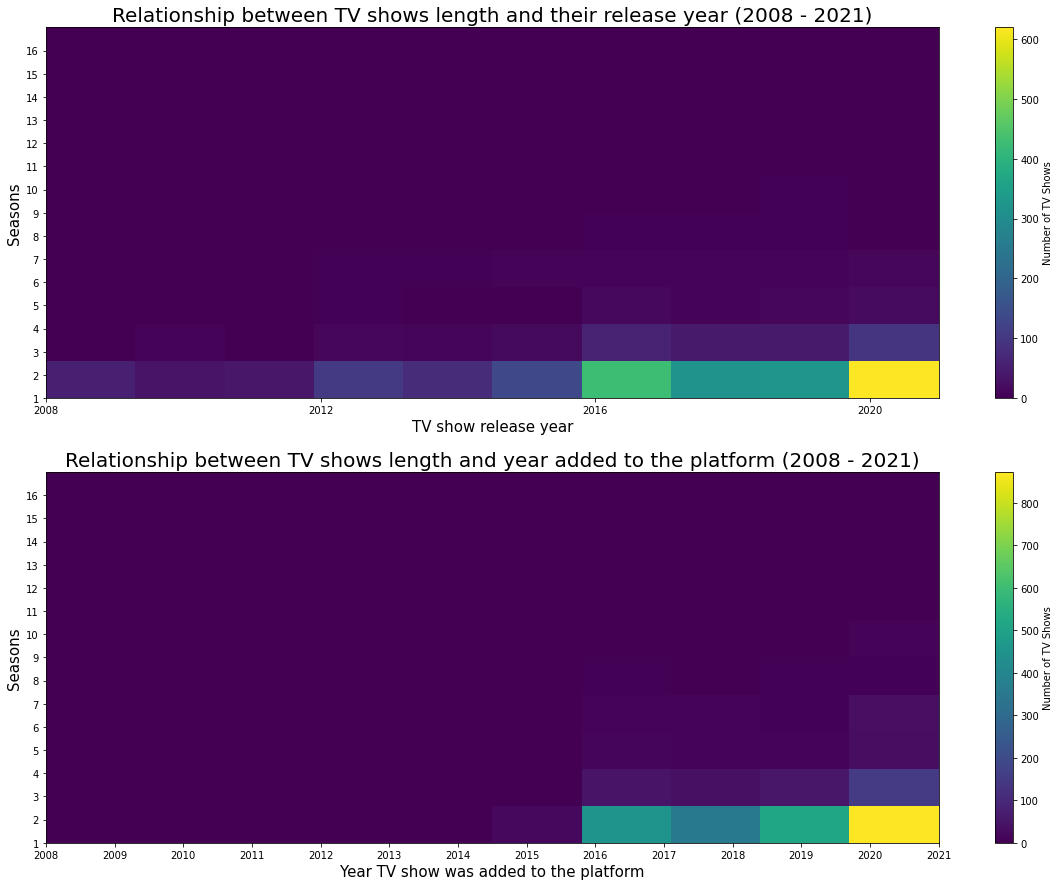

In [49]:
plt.figure(figsize=[20,15])
plt.subplot(2,1,1)
da_f = df_tv.release_year>2007
df_tv_f = df_tv[da_f]
tv_rd = plt.hist2d(data=df_tv_f,x='release_year',y='duration_seasons')
plt.xticks(np.arange(2008,2022,4));
plt.yticks(np.arange(1,17,1));
plt.xlabel('TV show release year',fontsize = 15)
plt.ylabel('Seasons',fontsize = 15)
plt.title("Relationship between TV shows length and their release year (2008 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of TV Shows')

plt.subplot(2,1,2)
da_f = df_tv.date_added.dt.year>2007
df_tv_f = df_tv[da_f]
tv_rd1 = plt.hist2d(data=df_tv_f,x=df_tv_f.date_added.dt.year,y='duration_seasons')
plt.xticks(np.arange(2008,2022,1));
plt.yticks(np.arange(1,17,1));
plt.xlabel('Year TV show was added to the platform',fontsize = 15)
plt.ylabel('Seasons',fontsize = 15)
plt.title("Relationship between TV shows length and year added to the platform (2008 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of TV Shows')

For both release year and year added to the platform, it seems to be that most of the TV shows just last for a single season.



C:\Users\84702\AppData\Local\Temp\ipykernel_6756\510630439.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_movie_f = df_movie[ry_f][da_f]


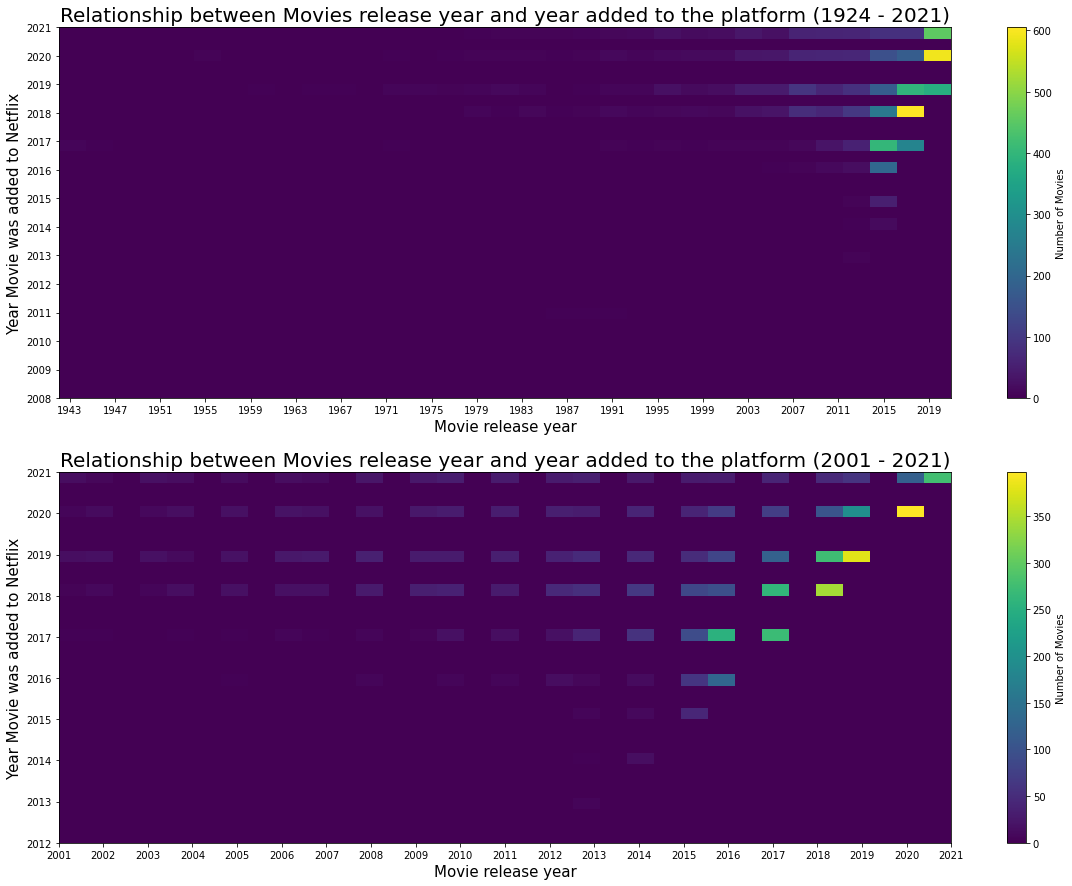

In [50]:
plt.figure(figsize=[20,15])
bins=np.arange(1943,2025,4)
plt.subplot(2,1,1)
movie_rd = plt.hist2d(data=df_movie,x='release_year',y=df_movie.date_added.dt.year, bins=33)
plt.xticks(np.arange(1943,2022,4));
plt.yticks(np.arange(2008,2022,1));
plt.xlabel('Movie release year',fontsize = 15)
plt.ylabel('Year Movie was added to Netflix',fontsize = 15)
plt.title("Relationship between Movies release year and year added to the platform (1924 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of Movies')

plt.subplot(2,1,2)
ry_f = df_movie.release_year>2000
da_f = df_movie.date_added.dt.year>2011
df_movie_f = df_movie[ry_f][da_f]
movie_rd1 = plt.hist2d(data=df_movie_f,x='release_year',y=df_movie_f.date_added.dt.year, bins=33)
plt.xticks(np.arange(2001,2022,1));
plt.yticks(np.arange(2012,2022,1));
plt.xlabel('Movie release year',fontsize = 15)
plt.ylabel('Year Movie was added to Netflix',fontsize = 15)
plt.title("Relationship between Movies release year and year added to the platform (2001 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of Movies')

There seems to be a clear increase since 2015 in the number of movies released in the same year as they were added to the platform. There is also a slight decrease in 2021 but this would have been likely due to COVID - since not many movies were made in 2020 and released in 2021.

### **Correlation**

Convert categories to numeric for further analysis.

In [45]:
df_movie['maincatx'] = df_movie['maincat'].apply(lambda x: cat_dict[x])
df_movie['subcat1x'] = df_movie['subcat1'].apply(lambda x: cat_dict[x])
df_movie['subcat2x'] = df_movie['subcat2'].apply(lambda x: cat_dict[x])


C:\Users\84702\AppData\Local\Temp\ipykernel_6756\3087780009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['maincatx'] = df_movie['maincat'].apply(lambda x: cat_dict[x])
C:\Users\84702\AppData\Local\Temp\ipykernel_6756\3087780009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['subcat1x'] = df_movie['subcat1'].apply(lambda x: cat_dict[x])
C:\Users\84702\AppData\Local\Temp\ipykernel_6756\3087780009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Let's see how the correlation between movie's duration, their category and release year.

In [46]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 8783
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           6126 non-null   object        
 1   type              6126 non-null   object        
 2   title             6126 non-null   object        
 3   director          6126 non-null   object        
 4   country           6126 non-null   object        
 5   date_added        6126 non-null   datetime64[ns]
 6   release_year      6126 non-null   int64         
 7   rating            6126 non-null   object        
 8   duration          6126 non-null   object        
 9   listed_in         6126 non-null   object        
 10  maincat           6126 non-null   object        
 11  subcat1           6126 non-null   object        
 12  subcat2           6126 non-null   object        
 13  duration_minutes  6126 non-null   int64         
 14  maincatx          6126 n

In [47]:
df_movie.corr()

,release_year,duration_minutes,maincatx,subcat1x,subcat2x
release_year,1.000000,-0.206248,0.038288,-0.083812,-0.085087
duration_minutes,-0.206248,1.000000,-0.213393,0.162568,0.278507
maincatx,0.038288,-0.213393,1.000000,-0.185968,0.035071
subcat1x,-0.083812,0.162568,-0.185968,1.000000,0.208871
subcat2x,-0.085087,0.278507,0.035071,0.208871,1.000000


<AxesSubplot:>

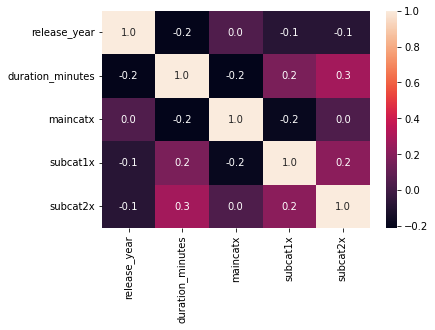

In [48]:
sns.heatmap(df_movie.corr(),annot=True,fmt='.1f')